In [1]:
import sqlite3
import pandas as pd


conn = sqlite3.connect('european_database.sqlite')

query = """
SELECT 
    m.*, d.name, d.country
FROM matchs m 
JOIN divisions d ON d.division == m.Div
"""

df = (
    pd.read_sql_query(query, conn)
    .assign(Date = lambda x: pd.to_datetime(x.Date))
)

In [2]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,name,country
0,B1,2020-08-08,Club Brugge,Charleroi,0.0,1.0,A,2021,Division 1A,Belgium
1,B1,2020-08-08,Antwerp,Mouscron,1.0,1.0,D,2021,Division 1A,Belgium
2,B1,2020-08-08,Standard,Cercle Brugge,1.0,0.0,H,2021,Division 1A,Belgium
3,B1,2020-08-09,St Truiden,Gent,2.0,1.0,H,2021,Division 1A,Belgium
4,B1,2020-08-09,Waregem,Genk,1.0,2.0,A,2021,Division 1A,Belgium


In [3]:
EPL = df.loc[df['Div']=='E0']
EPL.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,name,country
918,E0,2020-09-12,Fulham,Arsenal,0.0,3.0,A,2021,Premier League,England
919,E0,2020-09-12,Crystal Palace,Southampton,1.0,0.0,H,2021,Premier League,England
920,E0,2020-09-12,Liverpool,Leeds,4.0,3.0,H,2021,Premier League,England
921,E0,2020-09-12,West Ham,Newcastle,0.0,2.0,A,2021,Premier League,England
922,E0,2020-09-13,West Brom,Leicester,0.0,3.0,A,2021,Premier League,England


In [88]:
arsenal = EPL.loc[(EPL['HomeTeam']=='Arsenal') & (EPL['season']==2021)]
arsenal

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,name,country
929,E0,2020-09-19,Arsenal,West Ham,2.0,1.0,H,2021,Premier League,England
952,E0,2020-10-04,Arsenal,Sheffield United,2.0,1.0,H,2021,Premier League,England
973,E0,2020-10-25,Arsenal,Leicester,0.0,1.0,A,2021,Premier League,England
995,E0,2020-11-08,Arsenal,Aston Villa,0.0,3.0,A,2021,Premier League,England
1013,E0,2020-11-29,Arsenal,Wolves,1.0,2.0,A,2021,Premier League,England
1033,E0,2020-12-13,Arsenal,Burnley,0.0,1.0,A,2021,Premier League,England
1037,E0,2020-12-16,Arsenal,Southampton,1.0,1.0,D,2021,Premier League,England
1058,E0,2020-12-26,Arsenal,Chelsea,3.0,1.0,H,2021,Premier League,England
1087,E0,2021-01-14,Arsenal,Crystal Palace,0.0,0.0,D,2021,Premier League,England
1096,E0,2021-01-18,Arsenal,Newcastle,3.0,0.0,H,2021,Premier League,England


In [89]:
arsenal.groupby('FTR').size()

FTR
A    7
D    4
H    8
dtype: int64

# Sorting Out EPL teams

In [90]:
epl_teams = EPL.loc[(EPL['season']==2021)]
epl_teams

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,name,country
918,E0,2020-09-12,Fulham,Arsenal,0.0,3.0,A,2021,Premier League,England
919,E0,2020-09-12,Crystal Palace,Southampton,1.0,0.0,H,2021,Premier League,England
920,E0,2020-09-12,Liverpool,Leeds,4.0,3.0,H,2021,Premier League,England
921,E0,2020-09-12,West Ham,Newcastle,0.0,2.0,A,2021,Premier League,England
922,E0,2020-09-13,West Brom,Leicester,0.0,3.0,A,2021,Premier League,England
923,E0,2020-09-13,Tottenham,Everton,0.0,1.0,A,2021,Premier League,England
924,E0,2020-09-14,Brighton,Chelsea,1.0,3.0,A,2021,Premier League,England
925,E0,2020-09-14,Sheffield United,Wolves,0.0,2.0,A,2021,Premier League,England
926,E0,2020-09-19,Everton,West Brom,5.0,2.0,H,2021,Premier League,England
927,E0,2020-09-19,Leeds,Fulham,4.0,3.0,H,2021,Premier League,England


# Getting Win Rate of Each EPL Team

In [91]:
hometeam = epl_teams.groupby(['FTR','HomeTeam'])['HomeTeam'].size().to_frame('Home').reset_index()
hometeam.head()

,FTR,HomeTeam,Home
0,A,Arsenal,7
1,A,Aston Villa,8
2,A,Brighton,6
3,A,Burnley,9
4,A,Chelsea,4


In [92]:
hometeam['FTR'] = hometeam['FTR'].replace(['A','H'], ['L','W'])
hometeam_new = hometeam.groupby(['HomeTeam','FTR']).sum()
hometeam_new.head()

Home
HomeTeam    FTR      
Arsenal     D       4
            L       7
            W       8
Aston Villa D       4
            L       8

In [93]:
awayteam = epl_teams.groupby(['FTR','AwayTeam'])['AwayTeam'].size().to_frame('Away').reset_index()
awayteam.head()

,FTR,AwayTeam,Away
0,A,Arsenal,10
1,A,Aston Villa,9
2,A,Brighton,5
3,A,Burnley,6
4,A,Chelsea,10


In [94]:
awayteam['FTR'] = awayteam['FTR'].replace(['A','H'], ['W','L'])
awayteam_new = awayteam.groupby(['AwayTeam','FTR']).sum()
awayteam_new.head()

Away
AwayTeam    FTR      
Arsenal     D       3
            L       6
            W      10
Aston Villa D       3
            L       7

In [95]:
concatenated = pd.concat([hometeam_new, awayteam_new], axis=1).fillna(0)
concatenated

Home  Away
                 FTR            
Arsenal          D       4   3.0
                 L       7   6.0
                 W       8  10.0
Aston Villa      D       4   3.0
                 L       8   7.0
                 W       7   9.0
Brighton         D       9   5.0
                 L       6   9.0
                 W       4   5.0
Burnley          D       6   3.0
                 L       9  10.0
                 W       4   6.0
Chelsea          D       6   4.0
                 L       4   5.0
                 W       9  10.0
Crystal Palace   D       5   3.0
                 L       8  10.0
                 W       6   6.0
Everton          D       4   4.0
                 L       9   4.0
                 W       6  11.0
Fulham           D       4   9.0
                 L      13   7.0
                 W       2   3.0
Leeds            D       5   0.0
                 L       6   9.0
                 W       8  10.0
Leicester        D       1   5.0
                 L       9   3.0
                 W       9  11.0
Liverpool        D       3   6.0
                 L       6   3.0
                 W      10  10.0
Man City         D       2   3.0
                 L       4   2.0
                 W      13  14.0
Man United       D       4   7.0
                 L       6   0.0
                 W       9  12.0
Newcastle        D       5   4.0
                 L       8   9.0
                 W       6   6.0
Sheffield United D       1   1.0
                 L      13  16.0
                 W       5   2.0
Southampton      D       3   4.0
                 L       8  11.0
                 W       8   4.0
Tottenham        D       3   5.0
                 L       6   6.0
                 W      10   8.0
West Brom        D       6   5.0
                 L      10  12.0
                 W       3   2.0
West Ham         D       4   4.0
                 L       5   6.0
                 W      10   9.0
Wolves           D       4   5.0
                 L       8   9.0
                 W       7   5.0

In [96]:
total = concatenated['Home'] + concatenated['Away']
concatenated['Total'] = total

In [97]:
concatenated.head()

Home  Away  Total
            FTR                   
Arsenal     D       4   3.0    7.0
            L       7   6.0   13.0
            W       8  10.0   18.0
Aston Villa D       4   3.0    7.0
            L       8   7.0   15.0

In [98]:
EPL_teams = concatenated.reset_index()
EPL_teams.head()

,level_0,FTR,Home,Away,Total
0,Arsenal,D,4,3.0,7.0
1,Arsenal,L,7,6.0,13.0
2,Arsenal,W,8,10.0,18.0
3,Aston Villa,D,4,3.0,7.0
4,Aston Villa,L,8,7.0,15.0


In [99]:
Draw = EPL_teams.loc[EPL_teams['FTR']=='D']
Draw.head()

,level_0,FTR,Home,Away,Total
0,Arsenal,D,4,3.0,7.0
3,Aston Villa,D,4,3.0,7.0
6,Brighton,D,9,5.0,14.0
9,Burnley,D,6,3.0,9.0
12,Chelsea,D,6,4.0,10.0


In [100]:
Lose = EPL_teams.loc[EPL_teams['FTR']=='L']
Lose.head()

,level_0,FTR,Home,Away,Total
1,Arsenal,L,7,6.0,13.0
4,Aston Villa,L,8,7.0,15.0
7,Brighton,L,6,9.0,15.0
10,Burnley,L,9,10.0,19.0
13,Chelsea,L,4,5.0,9.0


In [101]:
Win = EPL_teams.loc[EPL_teams['FTR']=='W']
Win.head()

,level_0,FTR,Home,Away,Total
2,Arsenal,W,8,10.0,18.0
5,Aston Villa,W,7,9.0,16.0
8,Brighton,W,4,5.0,9.0
11,Burnley,W,4,6.0,10.0
14,Chelsea,W,9,10.0,19.0


In [102]:
df1 = Win.merge(right=Draw, how='inner', left_on='level_0', right_on='level_0')
df1

,level_0,FTR_x,Home_x,Away_x,Total_x,FTR_y,Home_y,Away_y,Total_y
0,Arsenal,W,8,10.0,18.0,D,4,3.0,7.0
1,Aston Villa,W,7,9.0,16.0,D,4,3.0,7.0
2,Brighton,W,4,5.0,9.0,D,9,5.0,14.0
3,Burnley,W,4,6.0,10.0,D,6,3.0,9.0
4,Chelsea,W,9,10.0,19.0,D,6,4.0,10.0
5,Crystal Palace,W,6,6.0,12.0,D,5,3.0,8.0
6,Everton,W,6,11.0,17.0,D,4,4.0,8.0
7,Fulham,W,2,3.0,5.0,D,4,9.0,13.0
8,Leeds,W,8,10.0,18.0,D,5,0.0,5.0
9,Leicester,W,9,11.0,20.0,D,1,5.0,6.0


In [103]:
df2 = df1.merge(right=Lose, how='inner', left_on='level_0', right_on='level_0')
df2.head()

,level_0,FTR_x,Home_x,Away_x,Total_x,FTR_y,Home_y,Away_y,Total_y,FTR,Home,Away,Total
0,Arsenal,W,8,10.0,18.0,D,4,3.0,7.0,L,7,6.0,13.0
1,Aston Villa,W,7,9.0,16.0,D,4,3.0,7.0,L,8,7.0,15.0
2,Brighton,W,4,5.0,9.0,D,9,5.0,14.0,L,6,9.0,15.0
3,Burnley,W,4,6.0,10.0,D,6,3.0,9.0,L,9,10.0,19.0
4,Chelsea,W,9,10.0,19.0,D,6,4.0,10.0,L,4,5.0,9.0


In [104]:
df2.rename(columns={'level_0':'Team','Home_x': 'Home_Win','Away_x':'Away_Win','Total_x':'Total_Win','Home_y':'Home_Draw','Away_y':'Away_Draw','Total_y':'Total_Draw','Home':'Home_Lose','Away':'Away_Lose','Total':'Total_Lose'}, inplace=True)

In [105]:
df2.head()

,Team,FTR_x,Home_Win,Away_Win,Total_Win,FTR_y,Home_Draw,Away_Draw,Total_Draw,FTR,Home_Lose,Away_Lose,Total_Lose
0,Arsenal,W,8,10.0,18.0,D,4,3.0,7.0,L,7,6.0,13.0
1,Aston Villa,W,7,9.0,16.0,D,4,3.0,7.0,L,8,7.0,15.0
2,Brighton,W,4,5.0,9.0,D,9,5.0,14.0,L,6,9.0,15.0
3,Burnley,W,4,6.0,10.0,D,6,3.0,9.0,L,9,10.0,19.0
4,Chelsea,W,9,10.0,19.0,D,6,4.0,10.0,L,4,5.0,9.0


In [106]:
EPL_scores = df2.drop(['FTR_x','FTR_y','FTR'], axis=1)

In [107]:
EPL_scores.head()

,Team,Home_Win,Away_Win,Total_Win,Home_Draw,Away_Draw,Total_Draw,Home_Lose,Away_Lose,Total_Lose
0,Arsenal,8,10.0,18.0,4,3.0,7.0,7,6.0,13.0
1,Aston Villa,7,9.0,16.0,4,3.0,7.0,8,7.0,15.0
2,Brighton,4,5.0,9.0,9,5.0,14.0,6,9.0,15.0
3,Burnley,4,6.0,10.0,6,3.0,9.0,9,10.0,19.0
4,Chelsea,9,10.0,19.0,6,4.0,10.0,4,5.0,9.0


# Finding the Win Percentage of Each Team

In [108]:
EPL_scores['Win %'] = round((EPL_scores.Total_Win / 38) * 100, 2)

In [129]:
EPL_scores

,Team,Home_Win,Away_Win,Total_Win,Home_Draw,Away_Draw,Total_Draw,Home_Lose,Away_Lose,Total_Lose,Win %
0,Arsenal,8,10.0,18.0,4,3.0,7.0,7,6.0,13.0,47.37
1,Aston Villa,7,9.0,16.0,4,3.0,7.0,8,7.0,15.0,42.11
2,Brighton,4,5.0,9.0,9,5.0,14.0,6,9.0,15.0,23.68
3,Burnley,4,6.0,10.0,6,3.0,9.0,9,10.0,19.0,26.32
4,Chelsea,9,10.0,19.0,6,4.0,10.0,4,5.0,9.0,50.00
5,Crystal Palace,6,6.0,12.0,5,3.0,8.0,8,10.0,18.0,31.58
6,Everton,6,11.0,17.0,4,4.0,8.0,9,4.0,13.0,44.74
7,Fulham,2,3.0,5.0,4,9.0,13.0,13,7.0,20.0,13.16
8,Leeds,8,10.0,18.0,5,0.0,5.0,6,9.0,15.0,47.37
9,Leicester,9,11.0,20.0,1,5.0,6.0,9,3.0,12.0,52.63


In [110]:
EPL_scores.to_csv("EPL_scores.csv")

In [111]:
import pandas as pd
from IPython.display import display
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data of Football Teams Statistics

In [112]:
teams = pd.read_csv('Football teams.csv')
teams.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [113]:
teams.isnull().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [114]:
teams.groupby('Tournament')['Team'].nunique()

Tournament
Bundesliga        18
LaLiga            20
Ligue 1           20
Premier League    20
Serie A           20
Name: Team, dtype: int64

# Sorting out Teams from Premier League Only

In [115]:
EPL_tournament = teams.loc[teams['Tournament']=='Premier League']
EPL_tournament.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
5,Manchester United,Premier League,73,13.8,64,1,54.5,84.8,14.5,6.85
7,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
11,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83
12,Liverpool,Premier League,68,16.0,40,0,59.0,85.7,14.3,6.82


In [116]:
EPL_tournament = EPL_tournament.sort_values('Team').reset_index()

In [117]:
EPL_tournament = EPL_tournament.drop('index', axis=1)

In [128]:
EPL_tournament

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Arsenal,Premier League,55,12.1,47,5,52.7,85.0,13.5,6.69
1,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84
2,Brighton,Premier League,40,12.8,45,6,50.7,81.3,14.2,6.65
3,Burnley,Premier League,33,10.1,48,0,43.5,71.6,23.4,6.64
4,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83
5,Crystal Palace,Premier League,41,9.2,54,2,42.9,76.1,18.3,6.61
6,Everton,Premier League,47,10.5,59,2,47.3,81.4,17.7,6.73
7,Fulham,Premier League,27,11.6,67,3,50.0,81.2,17.2,6.63
8,Leeds,Premier League,62,13.7,61,1,55.1,80.8,14.5,6.77
9,Leicester,Premier League,68,12.8,61,0,53.2,82.1,16.2,6.80


Merging Datasets

In [132]:
EPL_merged = EPL_tournament.merge(EPL_scores, left_index=True, right_index=True) #merge based on index 

In [120]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [135]:
EPL_merged = EPL_merged.drop('Team_y', axis=1)

In [136]:
EPL_merged

,Team_x,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating,Home_Win,Away_Win,Total_Win,Home_Draw,Away_Draw,Total_Draw,Home_Lose,Away_Lose,Total_Lose,Win %
0,Arsenal,Premier League,55,12.1,47,5,52.7,85.0,13.5,6.69,8,10.0,18.0,4,3.0,7.0,7,6.0,13.0,47.37
1,Aston Villa,Premier League,55,13.7,63,4,49.1,78.6,19.4,6.84,7,9.0,16.0,4,3.0,7.0,8,7.0,15.0,42.11
2,Brighton,Premier League,40,12.8,45,6,50.7,81.3,14.2,6.65,4,5.0,9.0,9,5.0,14.0,6,9.0,15.0,23.68
3,Burnley,Premier League,33,10.1,48,0,43.5,71.6,23.4,6.64,4,6.0,10.0,6,3.0,9.0,9,10.0,19.0,26.32
4,Chelsea,Premier League,58,14.6,49,3,58.6,87.0,15.2,6.83,9,10.0,19.0,6,4.0,10.0,4,5.0,9.0,50.00
5,Crystal Palace,Premier League,41,9.2,54,2,42.9,76.1,18.3,6.61,6,6.0,12.0,5,3.0,8.0,8,10.0,18.0,31.58
6,Everton,Premier League,47,10.5,59,2,47.3,81.4,17.7,6.73,6,11.0,17.0,4,4.0,8.0,9,4.0,13.0,44.74
7,Fulham,Premier League,27,11.6,67,3,50.0,81.2,17.2,6.63,2,3.0,5.0,4,9.0,13.0,13,7.0,20.0,13.16
8,Leeds,Premier League,62,13.7,61,1,55.1,80.8,14.5,6.77,8,10.0,18.0,5,0.0,5.0,6,9.0,15.0,47.37
9,Leicester,Premier League,68,12.8,61,0,53.2,82.1,16.2,6.80,9,11.0,20.0,1,5.0,6.0,9,3.0,12.0,52.63


# Top 5 Most Goals Scored by a Team

In [139]:
goals_scored = EPL_merged[['Team_x','Goals']].sort_values('Goals', ascending=False).head()
goals_scored

,Team_x,Goals
11,Manchester City,83
12,Manchester United,73
10,Liverpool,68
9,Leicester,68
16,Tottenham,68


In [140]:
sns.set_style('darkgrid')
sns.set(font_scale=1)

Text(0.5, 0.98, 'Top 5 Most Goals Scored by Team')

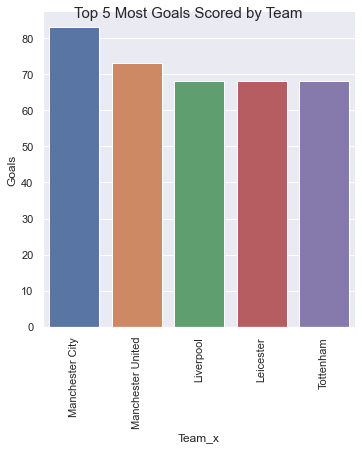

In [165]:
topteam = sns.catplot(kind='bar', x='Team_x', y='Goals', data=goals_scored)
topteam.set_xticklabels(rotation=90)
topteam.fig.suptitle("Top 5 Most Goals Scored by Team", fontsize=15)

# Teams with Most Possession

In [167]:
most_possession = EPL_merged[['Team_x','Possession%']].sort_values('Possession%', ascending=False).head()
most_possession

,Team_x,Possession%
11,Manchester City,60.8
10,Liverpool,59.0
4,Chelsea,58.6
8,Leeds,55.1
12,Manchester United,54.5


Text(0.5, 0.98, 'Top 5 Most Possession by Team')

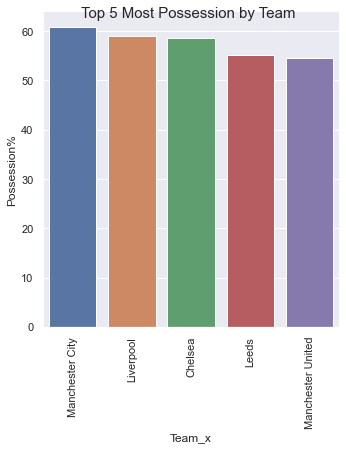

In [169]:
most_poss = sns.catplot(kind='bar', x='Team_x', y='Possession%', data=most_possession)
most_poss.set_xticklabels(rotation=90)
most_poss.fig.suptitle("Top 5 Most Possession by Team", fontsize=15)

# Shots PG per Team

In [144]:
shots_pg = EPL_merged[['Team_x','Shots pg']].sort_values('Shots pg', ascending=False)
shots_pg

,Team_x,Shots pg
10,Liverpool,16.0
11,Manchester City,15.8
4,Chelsea,14.6
12,Manchester United,13.8
1,Aston Villa,13.7
8,Leeds,13.7
9,Leicester,12.8
2,Brighton,12.8
18,West Ham,12.3
19,Wolverhampton Wanderers,12.2


Text(0.5, 0.98, 'Shots PG per Team')

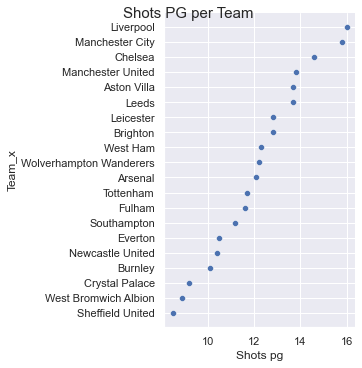

In [146]:
shots = sns.relplot(x='Shots pg', y='Team_x', data=shots_pg)
shots.fig.suptitle("Shots PG per Team", fontsize=15)

# Relationship Between Shot % and Goals Scored

Text(0.5, 0.98, 'Relationship Between Shot % and Goals Scored')

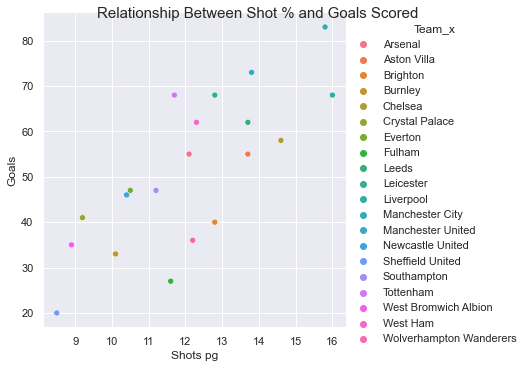

In [161]:
goals_shotspg = sns.relplot(x="Shots pg", y="Goals", hue='Team_x', data=EPL_merged)
goals_shotspg.fig.suptitle("Relationship Between Shot % and Goals Scored", fontsize=15)

# Relationship Between Win % and Possesssion %

Text(0.5, 0.98, 'Relationship Between Win % and Possesssion %')

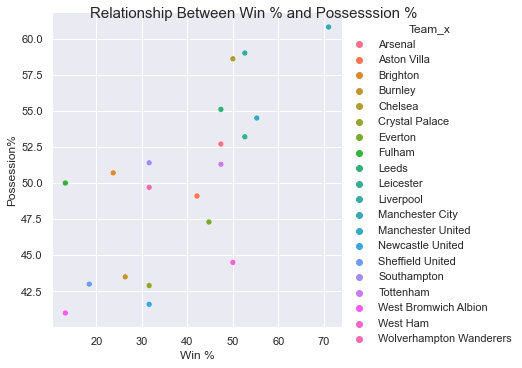

In [160]:
win_possession =  sns.relplot(x="Win %", y="Possession%", hue='Team_x', data=EPL_merged)
win_possession.fig.suptitle("Relationship Between Win % and Possesssion %", fontsize=15)

# Best Home Win Teams

In [162]:
home_win = EPL_merged[['Team_x','Home_Win']].sort_values('Home_Win', ascending=False).head()
home_win

,Team_x,Home_Win
11,Manchester City,13
10,Liverpool,10
18,West Ham,10
16,Tottenham,10
9,Leicester,9


# Best Away Win Teams

In [163]:
away_win = EPL_merged[['Team_x','Away_Win']].sort_values('Away_Win', ascending=False).head()
away_win

,Team_x,Away_Win
11,Manchester City,14.0
12,Manchester United,12.0
6,Everton,11.0
9,Leicester,11.0
0,Arsenal,10.0


Text(0.5, 0.98, 'Relationship Between Pass % and Win %')

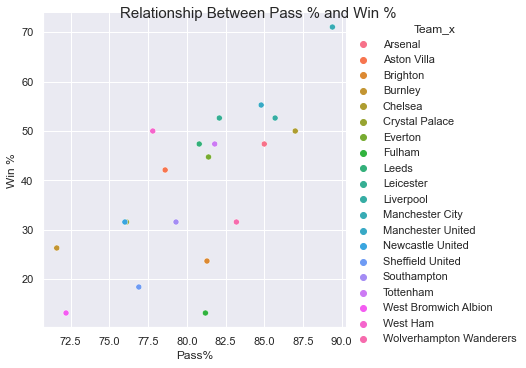

In [166]:
pass_winpg = sns.relplot(x="Pass%", y="Win %", hue='Team_x', data=EPL_merged)
pass_winpg.fig.suptitle("Relationship Between Pass % and Win %", fontsize=15)

# Comparison of Leagues

<ipython-input-171-28ee9131890f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tournaments=teams.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')


Text(0.5, 1.0, ' The different league details')

<Figure size 720x720 with 0 Axes>

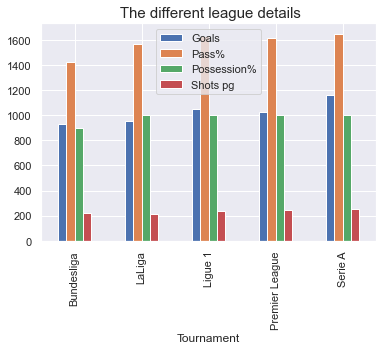

In [171]:
plt.figure(figsize=(10,10))
tournaments=teams.groupby('Tournament')['Goals','Pass%','Possession%','Shots pg'].sum().plot(kind='bar')
plt.title(" The different league details", fontsize=15)